In [118]:
import requests
import datetime
import pandas as pd

In [119]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [120]:
# Pretty print the JSON
import uuid
from IPython.display import display_javascript, display_html, display
import json

class RenderJSON(object):
    def __init__(self, json_data):
        if isinstance(json_data, dict):
            self.json_str = json.dumps(json_data)
        else:
            self.json_str = json_data
        self.uuid = str(uuid.uuid4())

    def _ipython_display_(self):
        display_html('<div id="{}" style="height: 600px; width:100%;"></div>'.format(self.uuid), raw=True)
        display_javascript("""
        require(["https://rawgit.com/caldwell/renderjson/master/renderjson.js"], function() {
        document.getElementById('%s').appendChild(renderjson(%s))
        });
        """ % (self.uuid, self.json_str), raw=True)

In [121]:
def price(symbol, comparison_symbols=['USD'], exchange=''):
    url = 'https://min-api.cryptocompare.com/data/price?fsym={}&tsyms={}'\
            .format(symbol.upper(), ','.join(comparison_symbols).upper())
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()
    return data

In [122]:
price('LTC', exchange='Coinbase')

{'USD': 152.24}

In [123]:
price('NEO', ['BTC', 'ETH', 'USD'])

{'BTC': 0.008259, 'ETH': 0.1158, 'USD': 76.33}

# Daily Historical Data

In [124]:
def daily_price_historical(symbol, comparison_symbol, limit=1, aggregate=1, exchange='', allData='true'):
    url = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&aggregate={}&allData={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate, allData)
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

In [125]:
df = daily_price_historical('BTC', 'USD')
print('Max length = %s' % len(df))
print('Max time = %s' % (df.timestamp.max() - df.timestamp.min()))
df.tail()


Max length = 2842
Max time = 2841 days 00:00:00


,close,high,low,open,time,volumefrom,volumeto,timestamp
2837,8968.25,9025.73,8804.20,8823.46,1524441600,61895.95,5.538923e+08,2018-04-22 19:00:00
2838,9655.77,9741.91,8957.68,8967.86,1524528000,136352.05,1.276465e+09,2018-04-23 19:00:00
2839,8873.62,9765.23,8757.06,9657.69,1524614400,192797.41,1.779806e+09,2018-04-24 19:00:00
2840,9254.98,9291.39,8669.38,8873.57,1524700800,109665.31,9.785519e+08,2018-04-25 19:00:00
2841,9257.25,9257.25,9254.98,9254.98,1524787200,0.00,0.000000e+00,2018-04-26 19:00:00


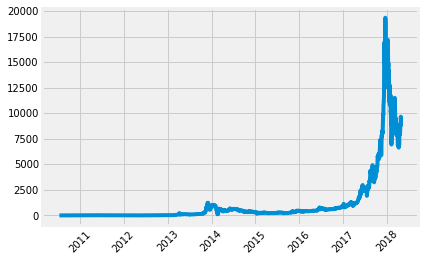

In [14]:
plt.plot(df.timestamp, df.close)
plt.xticks(rotation=45)
plt.show()

In [126]:

df1 = daily_price_historical('ETH', 'USD')
print('Max length = %s' % len(df1))
print('Max time = %s' % (df1.timestamp.max() - df1.timestamp.min()))
df1.tail()

Max length = 995
Max time = 994 days 00:00:00


,close,high,low,open,time,volumefrom,volumeto,timestamp
990,644.13,648.41,619.57,621.33,1524441600,373097.03,2.385568e+08,2018-04-22 19:00:00
991,703.35,711.64,644.06,644.13,1524528000,780339.81,5.383374e+08,2018-04-23 19:00:00
992,617.73,703.90,592.59,703.40,1524614400,1413475.83,9.036861e+08,2018-04-24 19:00:00
993,660.97,664.51,600.35,617.62,1524700800,605693.31,3.803850e+08,2018-04-25 19:00:00
994,660.15,660.97,660.15,660.97,1524787200,0.00,0.000000e+00,2018-04-26 19:00:00


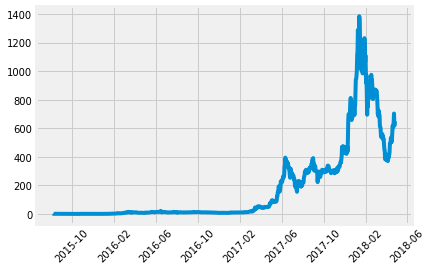

In [16]:
plt.plot(df1.timestamp, df1.close)
plt.xticks(rotation=45)
plt.show()

In [128]:

df2 = daily_price_historical('LTC', 'USD')
print('Max length = %s' % len(df2))
print('Max time = %s' % (df2.timestamp.max() - df2.timestamp.min()))
df2.tail()

Max length = 1647
Max time = 1646 days 00:00:00


,close,high,low,open,time,volumefrom,volumeto,timestamp
1642,152.64,153.52,146.48,146.67,1524441600,424096.60,6.399236e+07,2018-04-22 19:00:00
1643,164.69,165.98,152.61,152.64,1524528000,963993.50,1.556500e+08,2018-04-23 19:00:00
1644,144.99,164.88,140.67,164.69,1524614400,1182590.17,1.783665e+08,2018-04-24 19:00:00
1645,153.95,154.44,142.28,145.00,1524700800,493761.83,7.249833e+07,2018-04-25 19:00:00
1646,152.22,153.95,152.22,153.95,1524787200,0.00,0.000000e+00,2018-04-26 19:00:00


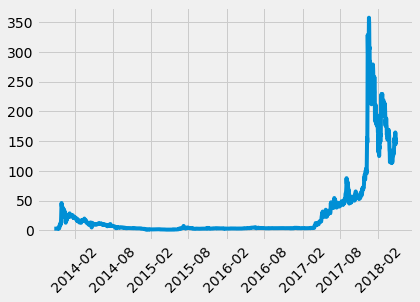

In [129]:
plt.plot(df2.timestamp, df2.close)
plt.xticks(rotation=45)
plt.show()

# Coin List

In [130]:
def coin_list():
    url = 'https://www.cryptocompare.com/api/data/coinlist/'
    page = requests.get(url)
    data = page.json()['Data']
    return data

In [131]:
data = coin_list()
RenderJSON(data)

In [132]:

print(len(data))

2466


In [133]:
symbol_id_dict = {symb: int(d['Id']) for symb, d in data.items()}

In [134]:
print(json.dumps(symbol_id_dict, indent=2))

{
  "XMR": 5038,
  "NXT": 1183,
  "DOGE": 4432,
  "ZEC": 24854,
  "BTS": 5039,
  "DGB": 4430,
  "BTCD": 4400,
  "PPC": 2349,
  "CRAIG": 4425,
  "XBS": 5023,
  "XPY": 5030,
  "PRC": 3638,
  "YBC": 3639,
  "DANK": 3640,
  "GIVE": 3641,
  "KOBO": 3642,
  "DT": 3643,
  "CETI": 3644,
  "SUP": 3645,
  "XPD": 3646,
  "GEO": 3647,
  "CHASH": 3648,
  "SPR": 3649,
  "NXTI": 3650,
  "WOLF": 3653,
  "XDP": 3655,
  "2015": 3744,
  "42": 4321,
  "AC": 4322,
  "ACOIN": 4323,
  "AERO": 4324,
  "ALF": 4325,
  "AGS": 4326,
  "AMC": 4327,
  "ALN": 4328,
  "APEX": 4330,
  "ARCH": 4331,
  "ARG": 4371,
  "ARI": 4332,
  "AUR": 4333,
  "AXR": 4334,
  "BCX": 4335,
  "BEN": 4336,
  "BET": 4337,
  "BITB": 4338,
  "BLU": 4340,
  "BLK": 4339,
  "BOST": 4342,
  "BQC": 4343,
  "XMY": 4345,
  "MOON": 4346,
  "ZET": 4347,
  "QTL": 4349,
  "ENRG": 4350,
  "QRK": 4351,
  "RIC": 4352,
  "DGC": 4353,
  "LIMX": 4354,
  "BTB": 4399,
  "CAIX": 4406,
  "BTE": 4401,
  "BTG*": 4402,
  "BTM": 4403,
  "BUK": 4404,
  "CACH": 4405,

# Live Coin Info

In [135]:
def coin_snapshot_full_by_id(symbol, symbol_id_dict={}):
    if not symbol_id_dict:
        symbol_id_dict = {
            'BTC': 1182,
            'ETH': 7605,
            'LTC': 3808
        }
    symbol_id = symbol_id_dict[symbol.upper()]
    url = 'https://www.cryptocompare.com/api/data/coinsnapshotfullbyid/?id={}'\
            .format(symbol_id)
    page = requests.get(url)
    data = page.json()['Data']
    return data

In [136]:
data = coin_snapshot_full_by_id('ETH', symbol_id_dict)
RenderJSON(data)

In [137]:
def live_social_status(symbol, symbol_id_dict={}):
    if not symbol_id_dict:
        symbol_id_dict = {
            'BTC': 1182,
            'ETH': 7605,
            'LTC': 3808
        }
    symbol_id = symbol_id_dict[symbol.upper()]
    url = 'https://www.cryptocompare.com/api/data/socialstats/?id={}'\
            .format(symbol_id)
    page = requests.get(url)
    data = page.json()['Data']
    return data

In [138]:
data = live_social_status('NEO', symbol_id_dict)
RenderJSON(data)

In [139]:
data = live_social_status('BTC', symbol_id_dict)
RenderJSON(data)

In [140]:
import numpy as np
import pandas as pd
 
class PastSampler:
    '''
    Forms training samples for predicting future values from past value
    '''
     
    def __init__(self, N, K, sliding_window = True):
        '''
        Predict K future sample using N previous samples
        '''
        self.K = K
        self.N = N
        self.sliding_window = sliding_window
 
    def transform(self, A):
        M = self.N + self.K     #Number of samples per row (sample + target)
        #indexes
        if self.sliding_window:
            I = np.arange(M) + np.arange(A.shape[0] - M + 1).reshape(-1, 1)
        else:
            if A.shape[0]%M == 0:
                I = np.arange(M)+np.arange(0,A.shape[0],M).reshape(-1,1)
                
            else:
                I = np.arange(M)+np.arange(0,A.shape[0] -M,M).reshape(-1,1)
            
        B = A[I].reshape(-1, M * A.shape[1], A.shape[2])
        ci = self.N * A.shape[1]    #Number of features per sample
        return B[:, :ci], B[:, ci:] #Sample matrix, Target matrix

#write in a file path
df.to_csv('bitcoin.csv',index=None)

#Columns of price data to use
columns = ['close']
time_stamps = df['timestamp']
df_new = df.loc[:,columns]
original_df = df

In [141]:
file_name='bitcoin_close.h5'

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# normalization
for c in columns:
    df[c] = scaler.fit_transform(df[c].values.reshape(-1,1))
    
#Features are input sample dimensions(channels)
A = np.array(df)[:,None,:]
original_A = np.array(original_df)[:,None,:]
time_stamps = np.array(time_stamps)[:,None,None]

#Make samples of temporal sequences of pricing data (channel)
NPS, NFS = 256, 16         #Number of past and future samples
ps = PastSampler(NPS, NFS, sliding_window=False)
B, Y = ps.transform(A)
input_times, output_times = ps.transform(time_stamps)
original_B, original_Y = ps.transform(original_A)

In [142]:
import h5py
with h5py.File(file_name,'w') as f:
    f.create_dataset("inputs", data = B)
    f.create_dataset('outputs', data = Y)
    f.create_dataset("input_times", data = input_times)
    f.create_dataset('output_times', data = output_times)
    f.create_dataset("original_datas", data=np.array(original_df))
    f.create_dataset('original_inputs',data=original_B)
    f.create_dataset('original_outputs',data=original_Y)

TypeError: Object dtype dtype('O') has no native HDF5 equivalent

In [82]:
import pandas as pd
import numpy as numpy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, MaxPooling1D, LeakyReLU, PReLU
from keras.utils import np_utils
from keras.callbacks import CSVLogger, ModelCheckpoint
import h5py
import os
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session


# Make the program use only one GPU
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
set_session(tf.Session(config=config))


with h5py.File(''.join(['bitcoin_close.h5']), 'r') as hf:
    datas = hf['inputs'].value
    labels = hf['outputs'].value


output_file_name='bitcoin_close_CNN_2_relu'

step_size = datas.shape[1]
batch_size= 8
nb_features = datas.shape[2]

epochs = 100

#split training validation
training_size = int(0.8* datas.shape[0])
training_datas = datas[:training_size,:]
training_labels = labels[:training_size,:]
validation_datas = datas[training_size:,:]
validation_labels = labels[training_size:,:]
#build model

# 2 layers
model = Sequential()


model.add(Conv1D(activation='relu', input_shape=(step_size, nb_features), strides=3, filters=8, kernel_size=20))
model.add(Dropout(0.5))
model.add(Conv1D( strides=4, filters=nb_features, kernel_size=16))

'''
# 3 Layers
model.add(Conv1D(activation='relu', input_shape=(step_size, nb_features), strides=3, filters=8, kernel_size=8))
#model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(Conv1D(activation='relu', strides=2, filters=8, kernel_size=8))
#model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(Conv1D( strides=2, filters=nb_features, kernel_size=8))
# 4 layers
model.add(Conv1D(activation='relu', input_shape=(step_size, nb_features), strides=2, filters=8, kernel_size=2))
#model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(Conv1D(activation='relu', strides=2, filters=8, kernel_size=2))
#model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(Conv1D(activation='relu', strides=2, filters=8, kernel_size=2))
#model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(Conv1D( strides=2, filters=nb_features, kernel_size=2))
'''

model.compile(loss='mse', optimizer='adam')
model.fit(training_datas, training_labels,verbose=1, batch_size=batch_size,validation_data=(validation_datas,validation_labels), epochs = epochs, callbacks=[CSVLogger(output_file_name+'.csv', append=True),ModelCheckpoint(output_file_name+'-{epoch:02d}-{val_loss:.5f}.hdf5', monitor='val_loss', verbose=1,mode='min')])


Train on 8 samples, validate on 2 samples
Epoch 1/100
8/8 [==============================] - 3s 327ms/step - loss: 428081761214267392.0000 - val_loss: 748100152396349440.0000

Epoch 00001: saving model to bitcoin_close_CNN_2_relu-01-748100152396349440.00000.hdf5
Epoch 2/100
8/8 [==============================] - 0s 878us/step - loss: 384040994762391552.0000 - val_loss: 730774529202192384.0000

Epoch 00002: saving model to bitcoin_close_CNN_2_relu-02-730774529202192384.00000.hdf5
Epoch 3/100
8/8 [==============================] - 0s 877us/step - loss: 356496716658114560.0000 - val_loss: 717877463966810112.0000

Epoch 00003: saving model to bitcoin_close_CNN_2_relu-03-717877463966810112.00000.hdf5
Epoch 4/100
8/8 [==============================] - 0s 1ms/step - loss: 305713298228117504.0000 - val_loss: 705349491040976896.0000

Epoch 00004: saving model to bitcoin_close_CNN_2_relu-04-705349491040976896.00000.hdf5
Epoch 5/100
8/8 [==============================] - 0s 1ms/step - loss: 28841


Epoch 00038: saving model to bitcoin_close_CNN_2_relu-38-551242800285351936.00000.hdf5
Epoch 39/100
8/8 [==============================] - 0s 1ms/step - loss: 69937404907094016.0000 - val_loss: 550373842502025216.0000

Epoch 00039: saving model to bitcoin_close_CNN_2_relu-39-550373842502025216.00000.hdf5
Epoch 40/100
8/8 [==============================] - 0s 877us/step - loss: 63868070656999424.0000 - val_loss: 549751793798610944.0000

Epoch 00040: saving model to bitcoin_close_CNN_2_relu-40-549751793798610944.00000.hdf5
Epoch 41/100
8/8 [==============================] - 0s 756us/step - loss: 62744150730080256.0000 - val_loss: 549842744026071040.0000

Epoch 00041: saving model to bitcoin_close_CNN_2_relu-41-549842744026071040.00000.hdf5
Epoch 42/100
8/8 [==============================] - 0s 1ms/step - loss: 57620241861050368.0000 - val_loss: 550448609292713984.0000

Epoch 00042: saving model to bitcoin_close_CNN_2_relu-42-550448609292713984.00000.hdf5
Epoch 43/100
8/8 [==============

8/8 [==============================] - 0s 2ms/step - loss: 36069410229714944.0000 - val_loss: 524607234181693440.0000

Epoch 00076: saving model to bitcoin_close_CNN_2_relu-76-524607234181693440.00000.hdf5
Epoch 77/100
8/8 [==============================] - 0s 1ms/step - loss: 31863683764191232.0000 - val_loss: 524973096675835904.0000

Epoch 00077: saving model to bitcoin_close_CNN_2_relu-77-524973096675835904.00000.hdf5
Epoch 78/100
8/8 [==============================] - 0s 1ms/step - loss: 33565358396801024.0000 - val_loss: 525274706459230208.0000

Epoch 00078: saving model to bitcoin_close_CNN_2_relu-78-525274706459230208.00000.hdf5
Epoch 79/100
8/8 [==============================] - 0s 1ms/step - loss: 36775550097817600.0000 - val_loss: 525295047424344064.0000

Epoch 00079: saving model to bitcoin_close_CNN_2_relu-79-525295047424344064.00000.hdf5
Epoch 80/100
8/8 [==============================] - 0s 878us/step - loss: 30313913534906368.0000 - val_loss: 524473849677348864.0000

Epo

In [83]:
model.fit(training_datas, training_labels,verbose=1, batch_size=batch_size,
          validation_data=(validation_datas,validation_labels), 
          epochs = epochs, callbacks=[CSVLogger(output_file_name+'.csv', append=True),
        ModelCheckpoint(output_file_name+'-{epoch:02d}-{val_loss:.5f}.hdf5', 
                        monitor='val_loss', verbose=1,mode='min')])

Train on 8 samples, validate on 2 samples
Epoch 1/100
8/8 [==============================] - 0s 1ms/step - loss: 25558289521573888.0000 - val_loss: 521493829568692224.0000

Epoch 00001: saving model to bitcoin_close_CNN_2_relu-01-521493829568692224.00000.hdf5
Epoch 2/100
8/8 [==============================] - 0s 1ms/step - loss: 26588716600393728.0000 - val_loss: 522386186333847552.0000

Epoch 00002: saving model to bitcoin_close_CNN_2_relu-02-522386186333847552.00000.hdf5
Epoch 3/100
8/8 [==============================] - 0s 1ms/step - loss: 28825819035992064.0000 - val_loss: 522575096175394816.0000

Epoch 00003: saving model to bitcoin_close_CNN_2_relu-03-522575096175394816.00000.hdf5
Epoch 4/100
8/8 [==============================] - 0s 877us/step - loss: 25364831309660160.0000 - val_loss: 522129725246668800.0000

Epoch 00004: saving model to bitcoin_close_CNN_2_relu-04-522129725246668800.00000.hdf5
Epoch 5/100
8/8 [==============================] - 0s 1ms/step - loss: 2503375590313


Epoch 00038: saving model to bitcoin_close_CNN_2_relu-38-516931028112113664.00000.hdf5
Epoch 39/100
8/8 [==============================] - 0s 1ms/step - loss: 18205919691145216.0000 - val_loss: 515131024498229248.0000

Epoch 00039: saving model to bitcoin_close_CNN_2_relu-39-515131024498229248.00000.hdf5
Epoch 40/100
8/8 [==============================] - 0s 877us/step - loss: 18201077115518976.0000 - val_loss: 513323427382165504.0000

Epoch 00040: saving model to bitcoin_close_CNN_2_relu-40-513323427382165504.00000.hdf5
Epoch 41/100
8/8 [==============================] - 0s 1ms/step - loss: 17408443048525824.0000 - val_loss: 511965049485524992.0000

Epoch 00041: saving model to bitcoin_close_CNN_2_relu-41-511965049485524992.00000.hdf5
Epoch 42/100
8/8 [==============================] - 0s 1ms/step - loss: 17634729842966528.0000 - val_loss: 510868080478388224.0000

Epoch 00042: saving model to bitcoin_close_CNN_2_relu-42-510868080478388224.00000.hdf5
Epoch 43/100
8/8 [================

Epoch 76/100
8/8 [==============================] - 0s 877us/step - loss: 15691525576982528.0000 - val_loss: 513211448994824192.0000

Epoch 00076: saving model to bitcoin_close_CNN_2_relu-76-513211448994824192.00000.hdf5
Epoch 77/100
8/8 [==============================] - 0s 877us/step - loss: 14259770311573504.0000 - val_loss: 515275129240944640.0000

Epoch 00077: saving model to bitcoin_close_CNN_2_relu-77-515275129240944640.00000.hdf5
Epoch 78/100
8/8 [==============================] - 0s 877us/step - loss: 14947697370857472.0000 - val_loss: 516378214281510912.0000

Epoch 00078: saving model to bitcoin_close_CNN_2_relu-78-516378214281510912.00000.hdf5
Epoch 79/100
8/8 [==============================] - 0s 873us/step - loss: 16211231652184064.0000 - val_loss: 515282276066525184.0000

Epoch 00079: saving model to bitcoin_close_CNN_2_relu-79-515282276066525184.00000.hdf5
Epoch 80/100
8/8 [==============================] - 0s 878us/step - loss: 15288681266937856.0000 - val_loss: 5131254

# LSTM

In [84]:
import pandas as pd
import numpy as numpy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Reshape
from keras.layers import Conv1D, MaxPooling1D
from keras.utils import np_utils
from keras.layers import LSTM, LeakyReLU
from keras.callbacks import CSVLogger, ModelCheckpoint
import h5py
import os
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session



os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
set_session(tf.Session(config=config))

with h5py.File(''.join(['bitcoin_close.h5']), 'r') as hf:
    datas = hf['inputs'].value
    labels = hf['outputs'].value




step_size = datas.shape[1]
units= 50
second_units = 30
batch_size = 8
nb_features = datas.shape[2]
epochs = 100
output_size=16
output_file_name='bitcoin_close_LSTM_1_tanh_leaky_'
#split training validation
training_size = int(0.8* datas.shape[0])
training_datas = datas[:training_size,:]
training_labels = labels[:training_size,:,0]
validation_datas = datas[training_size:,:]
validation_labels = labels[training_size:,:,0]


#build model
model = Sequential()
model.add(LSTM(units=units,activation='tanh', input_shape=(step_size,nb_features),return_sequences=False))
model.add(Dropout(0.8))
model.add(Dense(output_size))
model.add(LeakyReLU())
model.compile(loss='mse', optimizer='adam')
model.fit(training_datas, training_labels, batch_size=batch_size,
          validation_data=(validation_datas,validation_labels), epochs = epochs, 
          callbacks=[CSVLogger(output_file_name+'.csv', append=True),
                     ModelCheckpoint(output_file_name+'-{epoch:02d}-{val_loss:.5f}.hdf5',
                                     monitor='val_loss', verbose=1,mode='min')])


Train on 8 samples, validate on 2 samples
Epoch 1/100
8/8 [==============================] - 4s 463ms/step - loss: 0.9036 - val_loss: 0.4557

Epoch 00001: saving model to bitcoin_close_LSTM_1_tanh_leaky_-01-0.45568.hdf5
Epoch 2/100
8/8 [==============================] - 0s 21ms/step - loss: 1.2439 - val_loss: 0.4529

Epoch 00002: saving model to bitcoin_close_LSTM_1_tanh_leaky_-02-0.45293.hdf5
Epoch 3/100
8/8 [==============================] - 0s 23ms/step - loss: 0.7273 - val_loss: 0.4504

Epoch 00003: saving model to bitcoin_close_LSTM_1_tanh_leaky_-03-0.45039.hdf5
Epoch 4/100
8/8 [==============================] - 0s 23ms/step - loss: 0.9042 - val_loss: 0.4481

Epoch 00004: saving model to bitcoin_close_LSTM_1_tanh_leaky_-04-0.44811.hdf5
Epoch 5/100
8/8 [==============================] - 0s 24ms/step - loss: 0.9716 - val_loss: 0.4459

Epoch 00005: saving model to bitcoin_close_LSTM_1_tanh_leaky_-05-0.44590.hdf5
Epoch 6/100
8/8 [==============================] - 0s 24ms/step - loss: 

Epoch 47/100
8/8 [==============================] - 0s 23ms/step - loss: 0.5583 - val_loss: 0.3867

Epoch 00047: saving model to bitcoin_close_LSTM_1_tanh_leaky_-47-0.38667.hdf5
Epoch 48/100
8/8 [==============================] - 0s 26ms/step - loss: 0.9589 - val_loss: 0.3859

Epoch 00048: saving model to bitcoin_close_LSTM_1_tanh_leaky_-48-0.38593.hdf5
Epoch 49/100
8/8 [==============================] - 0s 22ms/step - loss: 0.4571 - val_loss: 0.3852

Epoch 00049: saving model to bitcoin_close_LSTM_1_tanh_leaky_-49-0.38521.hdf5
Epoch 50/100
8/8 [==============================] - 0s 23ms/step - loss: 0.5513 - val_loss: 0.3846

Epoch 00050: saving model to bitcoin_close_LSTM_1_tanh_leaky_-50-0.38456.hdf5
Epoch 51/100
8/8 [==============================] - 0s 25ms/step - loss: 0.4453 - val_loss: 0.3839

Epoch 00051: saving model to bitcoin_close_LSTM_1_tanh_leaky_-51-0.38391.hdf5
Epoch 52/100
8/8 [==============================] - 0s 23ms/step - loss: 0.6404 - val_loss: 0.3833

Epoch 0005

8/8 [==============================] - 0s 23ms/step - loss: 0.4646 - val_loss: 0.3741

Epoch 00093: saving model to bitcoin_close_LSTM_1_tanh_leaky_-93-0.37408.hdf5
Epoch 94/100
8/8 [==============================] - 0s 26ms/step - loss: 0.4475 - val_loss: 0.3740

Epoch 00094: saving model to bitcoin_close_LSTM_1_tanh_leaky_-94-0.37402.hdf5
Epoch 95/100
8/8 [==============================] - 0s 21ms/step - loss: 0.3231 - val_loss: 0.3740

Epoch 00095: saving model to bitcoin_close_LSTM_1_tanh_leaky_-95-0.37398.hdf5
Epoch 96/100
8/8 [==============================] - 0s 26ms/step - loss: 0.6376 - val_loss: 0.3739

Epoch 00096: saving model to bitcoin_close_LSTM_1_tanh_leaky_-96-0.37393.hdf5
Epoch 97/100
8/8 [==============================] - 0s 26ms/step - loss: 0.4416 - val_loss: 0.3738

Epoch 00097: saving model to bitcoin_close_LSTM_1_tanh_leaky_-97-0.37384.hdf5
Epoch 98/100
8/8 [==============================] - 0s 26ms/step - loss: 0.4520 - val_loss: 0.3738

Epoch 00098: saving mod

In [86]:
from keras import applications
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.callbacks import CSVLogger
import tensorflow as tf
from scipy.ndimage import imread
import numpy as np
import random
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D, LeakyReLU
from keras import backend as K
import keras
from keras.callbacks import CSVLogger, ModelCheckpoint
from keras.backend.tensorflow_backend import set_session
from keras import optimizers
import h5py
from sklearn.preprocessing import MinMaxScaler
import os
import pandas as pd
# import matplotlib

import matplotlib.pyplot as plt

os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

with h5py.File(''.join(['bitcoin_close.h5']), 'r') as hf:
    datas = hf['inputs'].value
    labels = hf['outputs'].value
    input_times = hf['input_times'].value
    output_times = hf['output_times'].value
    original_inputs = hf['original_inputs'].value
    original_outputs = hf['original_outputs'].value
    original_datas = hf['original_datas'].value
    

scaler=MinMaxScaler()
#split training validation
training_size = int(0.8* datas.shape[0])
training_datas = datas[:training_size,:,:]
training_labels = labels[:training_size,:,:]
validation_datas = datas[training_size:,:,:]
validation_labels = labels[training_size:,:,:]
validation_original_outputs = original_outputs[training_size:,:,:]
validation_original_inputs = original_inputs[training_size:,:,:]
validation_input_times = input_times[training_size:,:,:]
validation_output_times = output_times[training_size:,:,:]

ground_true = np.append(validation_original_inputs,validation_original_outputs, axis=1)
ground_true_times = np.append(validation_input_times,validation_output_times, axis=1)
step_size = datas.shape[1]
batch_size= 8
nb_features = datas.shape[2]

model = Sequential()

# 2 layers
model.add(Conv1D(activation='relu', input_shape=(step_size, nb_features), strides=3, filters=8, kernel_size=20))
# model.add(LeakyReLU())
model.add(Dropout(0.25))
model.add(Conv1D( strides=4, filters=nb_features, kernel_size=16))
model.load_weights('bitcoin_close_CNN_2_relu-44-551896425588326400.00000.hdf5')
model.compile(loss='mse', optimizer='adam')

In [89]:
predicted = model.predict(validation_datas)
predicted_inverted = []

for i in range(original_datas.shape[1]):
    scaler.fit(original_datas[:,i].reshape(-1,1))
    predicted_inverted.append(scaler.inverse_transform(predicted[:,:,i]))
print (np.array(predicted_inverted).shape)
#get only the close data
ground_true = ground_true[:,:,0].reshape(-1)
ground_true_times = ground_true_times.reshape(-1)
ground_true_times = pd.to_datetime(ground_true_times, unit='s')
# since we are appending in the first dimension
predicted_inverted = np.array(predicted_inverted)[0,:,:].reshape(-1)
print (np.array(predicted_inverted).shape)
validation_output_times = pd.to_datetime(validation_output_times.reshape(-1), unit='s')

(8, 2, 16)
(32,)


In [90]:
ground_true_df = pd.DataFrame()
ground_true_df['times'] = ground_true_times
ground_true_df['value'] = ground_true

prediction_df = pd.DataFrame()
prediction_df['times'] = validation_output_times
prediction_df['value'] = predicted_inverted

prediction_df = prediction_df.loc[(prediction_df["times"].dt.year == 2017 )&(prediction_df["times"].dt.month > 7 ),: ]
ground_true_df = ground_true_df.loc[(ground_true_df["times"].dt.year == 2017 )&(ground_true_df["times"].dt.month > 7 ),:]

In [108]:
ground_true_df.head()

,times,value


In [107]:
prediction_df.head()

,times,value


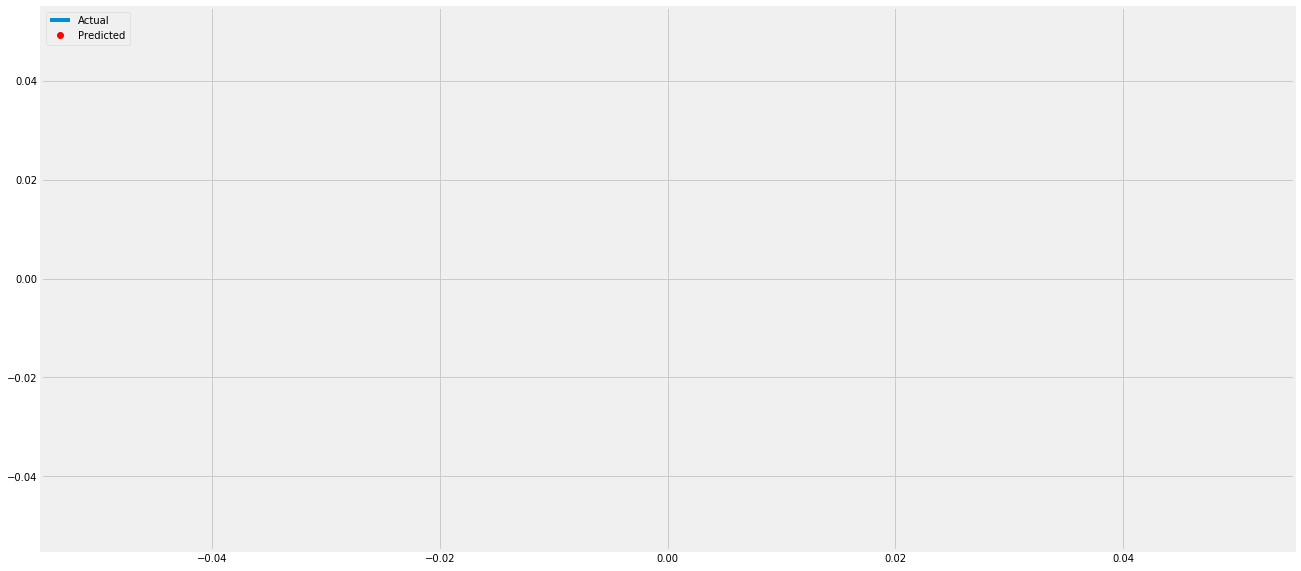

In [92]:
plt.figure(figsize=(20,10))
plt.plot(ground_true_df.times,ground_true_df.value, label = 'Actual')
plt.plot(prediction_df.times,prediction_df.value,'ro', label='Predicted')
plt.legend(loc='upper left')
plt.show()